This code is my project for CpE 590 a linear regression algorithm.

using the "RF Signal Data" dataset from https://www.kaggle.com/datasets/suraj520/rf-signal-data/data

Please note that since this dataset is so huge I have trimmed down a number of words and converted 2 columns to log scale so everything is on "equal terms"


This will perform a linear regression predict the Signal strength based on frequency and bandwidth.

In [1]:
import pandas as pd
import math as m

In [2]:
rf_stats = pd.read_csv(r"C:\Users\micha\Documents\GitHub\Cpe590project\logged_data_trim - logged_data_trim.csv")

In [3]:
rf_stats


,Timestamp,Frequency,Signal Strength,Modulation,Bandwidth,Location,Device Type,Antenna Type,Temperature,Humidity,...,Disk Usage,System Load,Latitude,Longitude,Altitude(m),Air Pressure,Device Status,I/Q Data,Bandwidth Log10,Frequency Log10
0,5/5/2023 0:00,120000000,-44,QAM,50000,"Patna, Bihar",HackRF,Yagi,24,47,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.7204492334669581-0.13150053996590505j), (...",46.9897,80.791812
1,5/5/2023 0:00,160000000,-97,FM,1000000,"Patna, Bihar",HackRF,Yagi,27,39,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.9514742558373084-0.2713158600194827j), (-...",60.0000,82.041200
2,5/5/2023 0:00,90000000,-87,BPSK,500000,"Patna, Bihar",Halow-U,Yagi,40,58,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(0.2227144792597957+0.958588241755097j), (0.2...",56.9897,79.542425
3,5/5/2023 0:01,160000000,-29,FM,100000,"Patna, Bihar",Halow-U,Dipole,28,50,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(-0.3238055039162817+0.855187296295747j), (-0...",50.0000,82.041200
4,5/5/2023 0:01,70000000,-26,8PSK,10000,"Patna, Bihar",HackRF,Omnidirectional,22,78,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.30500282741187124-0.26473341302686326j), ...",40.0000,78.450980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,5/5/2023 7:34,90000000,-3,QAM,10000,"Patna, Bihar",SteamDeck,Yagi,26,29,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Running game,NaN,40.0000,79.542425
1363,5/5/2023 7:34,70000000,-27,QAM,50000,"Patna, Bihar",SteamDeck,Dipole,29,70,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Running game,NaN,46.9897,78.450980
1364,5/5/2023 7:34,70000000,-34,8PSK,200000,"Patna, Bihar",SteamDeck,Dipole,33,50,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Running game,NaN,53.0103,78.450980
1365,5/5/2023 7:35,90000000,-43,QPSK,100000,"Patna, Bihar",SteamDeck,Dipole,23,24,...,18.5,4.300781,25.612677,85.158875,59.46,NaN,Running game,NaN,50.0000,79.542425


In [4]:
#removing some extra columns

rf_stats = rf_stats[["Frequency","Signal Strength","Bandwidth", "Temperature","Bandwidth Log10", "Frequency Log10"]]

In [5]:
rf_stats


,Frequency,Signal Strength,Bandwidth,Temperature,Bandwidth Log10,Frequency Log10
0,120000000,-44,50000,24,46.9897,80.791812
1,160000000,-97,1000000,27,60.0000,82.041200
2,90000000,-87,500000,40,56.9897,79.542425
3,160000000,-29,100000,28,50.0000,82.041200
4,70000000,-26,10000,22,40.0000,78.450980
...,...,...,...,...,...,...
1362,90000000,-3,10000,26,40.0000,79.542425
1363,70000000,-27,50000,29,46.9897,78.450980
1364,70000000,-34,200000,33,53.0103,78.450980
1365,90000000,-43,100000,23,50.0000,79.542425


In [6]:
#check for correlation

rf_stats.corr()["Signal Strength"]

Frequency          0.028303
Signal Strength    1.000000
Bandwidth         -0.052850
Temperature        0.041512
Bandwidth Log10   -0.018863
Frequency Log10    0.029379
Name: Signal Strength, dtype: float64

In [8]:
# There does not seem to be a strong linear relationship at first glance

In [9]:
import seaborn as sns

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


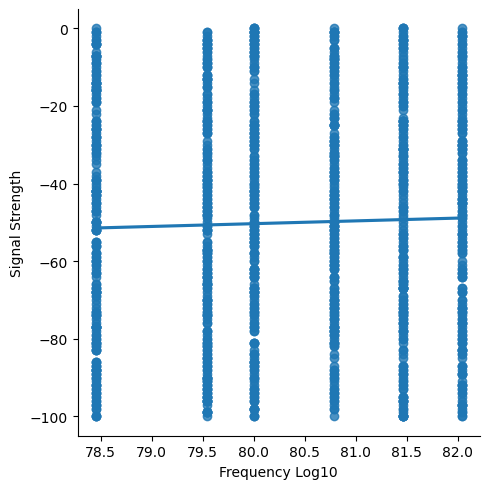

In [15]:
sns.lmplot(x="Frequency Log10", y="Signal Strength", data = rf_stats, fit_reg=True, ci = None)

In [19]:
#even though there doesn't seem to be any y strong correlation, we will continue
# on this path, and explore why that is in the paper.

In [18]:
# checking for missing values... a little more data cleaning
rf_stats[rf_stats.isnull().any(axis=1)]

,Frequency,Signal Strength,Bandwidth,Temperature,Bandwidth Log10,Frequency Log10


In [22]:
#yay!  there are no missing values

#Split it up
from numpy.random import RandomState


rng = RandomState()

train = rf_stats.sample(frac=0.7, random_state=rng)
test = rf_stats.loc[~rf_stats.index.isin(train.index)]

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [23]:
predictors = ["Bandwidth Log10", "Frequency Log10"]
target = "Signal Strength"

In [28]:
reg.fit(train[predictors], train["Signal Strength"])

LinearRegression()

In [29]:
predictions = reg.predict(test[predictors])

In [30]:
predictions

array([-48.52782935, -49.65933085, -47.36931746, -48.91639532,
       -49.65933085, -53.35508009, -51.50720547, -54.27999088,
       -51.0650667 , -45.93701921, -51.98895283, -46.92717868,
       -51.0650667 , -49.69893944, -50.81784275, -49.65933085,
       -52.66571737, -51.50720547, -51.0650667 , -50.81784275,
       -52.67831555, -48.09828877, -45.07930406, -50.37570397,
       -51.50720547, -48.2270326 , -46.67995473, -50.81784275,
       -49.9065548 , -51.98895283, -45.93701921, -46.92717868,
       -48.2270326 , -54.96935361, -48.05868018, -45.93701921,
       -45.93701921, -46.92717868, -48.52782935, -54.27999088,
       -48.05868018, -48.09828877, -46.67995473, -52.66571737,
       -48.7750533 , -48.2270326 , -50.38932682, -54.96935361,
       -48.96996813, -48.09828877, -51.98895283, -48.52782935,
       -46.67995473, -49.21719208, -50.38830216, -53.36870293,
       -50.81784275, -48.52782935, -49.69893944, -50.517046  ,
       -48.96996813, -53.36870293, -52.66571737, -48.05

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test["Signal Strength"], predictions)

mse = mean_squared_error(test["Signal Strength"], predictions)

In [40]:
mae

24.403118809091033

The mean absolute error is 24 dBm which is really large(remember this is in log scale)

In [42]:
rf_stats.describe()["Signal Strength"]

count    1367.000000
mean      -50.092904
std        29.154674
min      -100.000000
25%       -75.000000
50%       -50.000000
75%       -25.500000
max         0.000000
Name: Signal Strength, dtype: float64

Interesting enough, the error is actually below the stdev.

In [41]:
mse

812.5817569589835

In [ ]:
#the mse is just ridiculous